## Support Vector Machine(SVM) using Pearson's Correlation as feature selection

In this assignment, we will be using Support Vector Regression(SVR) from the Support Vector Machine(SVM) using Scikit-learn 
module. The purpose of this model is to predict the miles per gallon(mpg) of city-cycle fuel consumption which is our target variable using several input 
variables.

Import standard modules and dataset

In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")
df = pd.read_csv("auto_mpg.csv",sep=";")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


The info will allows us to see the information of the overall dataset so that we can understand the dataset easily

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


The is to check whether each features contain null values

In [26]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
Brand           0
dtype: int64

This is to understand the dataset

In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.070352,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.374531,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [32]:
df.rename(columns={'Brand':'car_name'},inplace=True)

To check if car_name feature is useful for the modelling or not

In [33]:
unique = df['car_name'].nunique()
unique

305

There are 305 distinct car_name out of 398 rows which shows that the feature is not very important to the modelling.
Hence, we can drop the feature from the dataset.

In [34]:
df_new = df.drop(['car_name'],axis = 1)
df_new.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Pearson's Correlation Feature Selection(Filter method)

Plot the Pearson correlation heatmap to check the correlation matrix of the mpg with other features. 
This is to determine the correlation of independent variables with the output variable, mpg

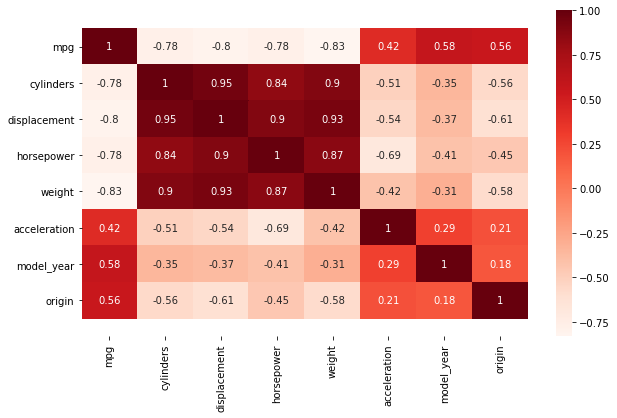

In [35]:
plt.figure(figsize=(10,6))
corrmat = df_new.corr() #default is Pearson's Correlation
ax=sns.heatmap(corrmat, annot=True, cmap=plt.cm.Reds) #create heatmap
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [36]:
corr_matrix=df_new.corr() #default is Pearson's Correlation
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777428,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.843291,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897904,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777428,0.843291,0.897904,1.000000,0.865309,-0.688285,-0.413942,-0.450202
weight,-0.831741,0.896017,0.932824,0.865309,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.688285,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413942,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.450202,-0.581024,0.205873,0.180662,1.000000


We can see that features weight,displacement,horsepower and cylinders are highly correlated with the output variable, mpg.
So, we can drop all other features except these. However, one of the assumption of regression is that the independent variable 
need to be uncorrelated with each other. If these independent variable is correlated, then keep one of them and drop the rest

In [37]:
#Correlation with output variable
corrmat_target = abs(corrmat["mpg"]).sort_values(ascending=True)
print(corrmat_target)

acceleration    0.420289
origin          0.563450
model_year      0.579267
cylinders       0.775396
horsepower      0.777428
displacement    0.804203
weight          0.831741
mpg             1.000000
Name: mpg, dtype: float64


To check whether the independent variable is correlated with each other. Higher correlation mean both features are correlated.
For this dataset, weight, cylinders, horsepower and displacement are highly correlated to mpg. For example, weight and displacement are highly correlated to mpg. However, both of the features are highly correlated to each other. Thus, one of them will be kept and another will be dropped. We choose to keep weight(0.831741) because it is highly correlated to mpg compared to displacement(0.804203).

In [38]:
print(df_new[['weight','displacement']].corr())

                weight  displacement
weight        1.000000      0.932824
displacement  0.932824      1.000000


In [39]:
print(df_new[['weight','horsepower']].corr())

              weight  horsepower
weight      1.000000    0.865309
horsepower  0.865309    1.000000


In [40]:
print(df_new[['cylinders','weight']].corr())

           cylinders    weight
cylinders   1.000000  0.896017
weight      0.896017  1.000000


In [41]:
print(df_new[['weight','model_year']].corr())

              weight  model_year
weight      1.000000   -0.306564
model_year -0.306564    1.000000


In [42]:
print(df_new[['model_year','origin']].corr())

            model_year    origin
model_year    1.000000  0.180662
origin        0.180662  1.000000


In [43]:
print(df_new[['origin','acceleration']].corr())

                origin  acceleration
origin        1.000000      0.205873
acceleration  0.205873      1.000000


In [44]:
# Check for multicollinearity using variance inflation vector
# A variable affected by multicollinearity will have a value greater than 10
X1 = sm.tools.add_constant(df_new) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

df_latest_data=df_new.drop(['displacement','cylinders','horsepower'],axis = 1)

X2 = sm.tools.add_constant(df_latest_data)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

print('Features before feature selection: \n\n{}\n'.format(series1))
print('Features after feature selection: \n\n{}'.format(series2))


Features before feature selection: 

const           788.116555
mpg               5.596044
cylinders        10.760210
displacement     22.382134
horsepower       10.011891
weight           13.633153
acceleration      2.614517
model_year        1.953366
origin            1.884120
dtype: float64

Features after feature selection: 

const           601.178542
mpg               5.490381
weight            4.075494
acceleration      1.260868
model_year        1.827624
origin            1.594130
dtype: float64


Based on the above correlation of features comparison, we are left with weight,acceleration,model year and origin.
These are the final features given by Pearson's correlation

In [45]:
df_latest_data=df_new.drop(['displacement','cylinders','horsepower'],axis = 1)
df_latest_data.head()

,mpg,weight,acceleration,model_year,origin
0,18.0,3504.0,12.0,70,1
1,15.0,3693.0,11.5,70,1
2,18.0,3436.0,11.0,70,1
3,16.0,3433.0,12.0,70,1
4,17.0,3449.0,10.5,70,1


We use the chosen features for our input variable based on Pearson's Correlation. Perform StandardScaler to 
scales all the data features

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df_latest_data.iloc[:,1:].values
y=df_latest_data['mpg'].values
scaleX=StandardScaler()
scaleY=StandardScaler()
X_transform = scaleX.fit_transform(X)
y_transform = scaleY.fit_transform(y.reshape(-1,1))



Split the dataset into training and testing sets

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y_transform,train_size=0.8,random_state = 1)
print(X_train.shape)
print(X_test.shape)

(318, 4)
(80, 4)


## Hyperparameter Tuning of SVM using GridSearchCV

Search for the optimal parameter using GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['linear','rbf','poly'], 'C': [0.1, 1, 5],'degree': [2,3,4]}
gsc = GridSearchCV(SVR(), parameters,scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error','r2'],n_jobs=3,refit ='r2')
gsc.fit(X_train, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [0.1, 1, 5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit='r2', return_train_score=False,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'r2'],
             verbose=0)

In [279]:
gsc.cv_results_

{'mean_fit_time': array([0.00399454, 0.00332705, 0.00199962, 0.00300535, 0.00198134,
        0.0029916 , 0.00299176, 0.00232728, 0.00232697, 0.00432189,
        0.00365726, 0.00332355, 0.0056541 , 0.00365694, 0.00565116,
        0.00465361, 0.00299191, 0.00531912, 0.01063736, 0.00564965,
        0.00398914, 0.00764616, 0.0040013 , 0.01363007, 0.01097059,
        0.00498637, 0.01929331]),
 'std_fit_time': array([1.63448872e-03, 4.87948706e-04, 2.33828548e-05, 1.76465543e-05,
        1.80992350e-05, 4.89903609e-07, 8.14296085e-04, 4.69459697e-04,
        4.70527427e-04, 4.69965550e-04, 4.70302885e-04, 4.69515903e-04,
        4.72394874e-04, 4.68898385e-04, 4.69965550e-04, 4.70302724e-04,
        7.78671819e-07, 4.70021655e-04, 1.24319934e-03, 4.72101150e-04,
        1.12391596e-07, 4.70415035e-04, 1.55689746e-05, 3.29026400e-03,
        1.62878681e-03, 4.49566384e-07, 6.94235759e-03]),
 'mean_score_time': array([0.00199294, 0.00231846, 0.00198476, 0.00131536, 0.0023272 ,
        0.001330

Get the best parameters

In [10]:
print('The best parameter to use in SVR is',gsc.best_params_)
print('The best index is',gsc.best_index_)

The best parameter to use in SVR is {'C': 5, 'degree': 2, 'kernel': 'rbf'}
The best index is 19


Build a predictive model using Support Vector Regression based on the optimal parameters

In [11]:
model=SVR(kernel='rbf',C=5,degree=2)
model.fit(X_train,y_train) #to learn the train data

SVR(C=5, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
print(model.score(X_train,y_train)) #determine the accuracy measure of the model based on train data
print(model.score(X_test,y_test)) #determine the accuracy measure of the model based on test data

0.9190225739220784
0.9110268981042768


Run the prediction using the input test data

In [13]:
y_predict = model.predict(X_test)

To compare the actual values of mpg with the predicted values of mpg using integers

In [289]:
df_y_predicted = pd.DataFrame(model.predict(X_test[0:5])) # choose the first 5 predicted values
df_y_test=pd.DataFrame(y_test[0:5])# choose the first 5 test values

In [290]:
comparison=pd.concat([df_y_test,df_y_predicted],axis=1) #combine both column together
comparison.columns=['Test Values', 'Predicted Values']
print(comparison)

   Test Values  Predicted Values
0    -0.706439         -0.290561
1     0.587411          0.882370
2    -0.527093         -0.872573
3    -0.411800         -0.009318
4    -0.424610         -0.327026


## Make some plots to visualize the accuracy of model prediction

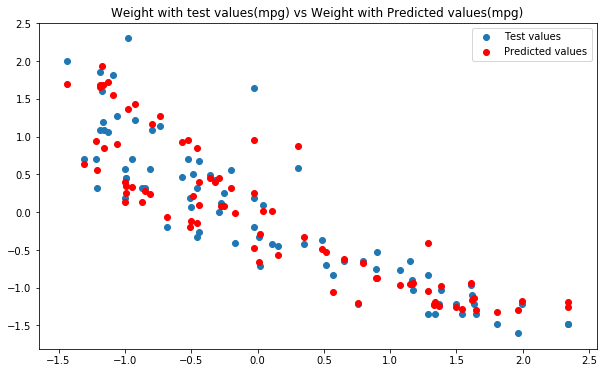

In [291]:
#scatter plot of weight(feature) with test values and predicted values to check the accuracy of the model
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 0], y_test,label='Test values') 
plt.scatter(X_test[:, 0], y_predict,label='Predicted values', c='r')
plt.title('Weight with test values(mpg) vs Weight with Predicted values(mpg)')
plt.legend()
plt.show()

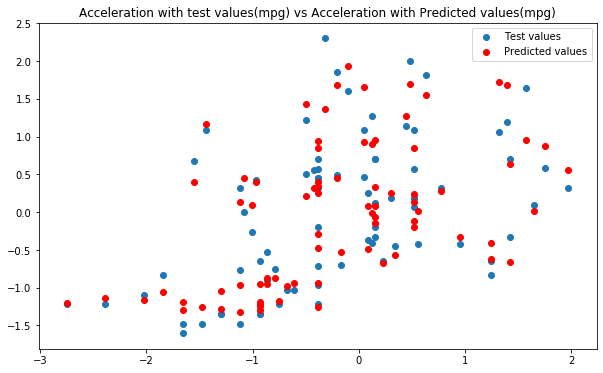

In [293]:
#scatter plot of acceleration(feature) with test values and predicted values to check the accuracy of the model
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 1], y_test,label='Test values') 
plt.scatter(X_test[:, 1], y_predict,label='Predicted values', c='r')
plt.title('Acceleration with test values(mpg) vs Acceleration with Predicted values(mpg)')
plt.legend()
plt.show()

Plot the graph to show comparison between the actual mpg and the predicted mpg

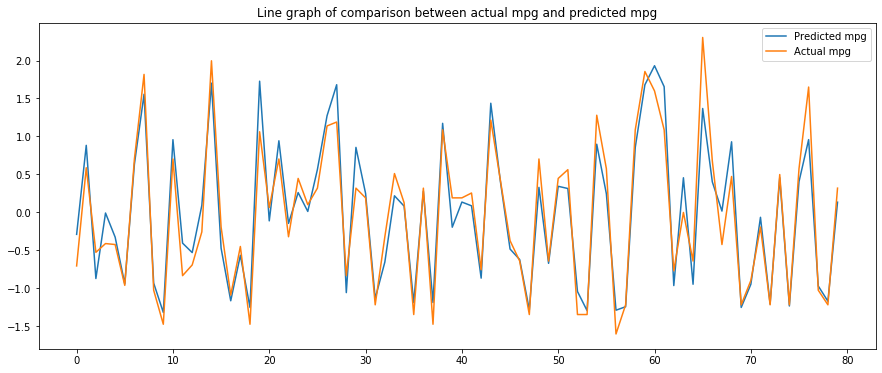

In [294]:
plt.subplots(figsize=(15,6)) #to change the size of graph
plt.plot(y_predict,label='Predicted mpg')
plt.plot(y_test, label = 'Actual mpg')
plt.title("Line graph of comparison between actual mpg and predicted mpg")
plt.legend()
plt.show()

To determine the error of the prediction and goodness of fit of a model

In [295]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model_mse = mean_squared_error(y_test, y_predict)# to determine the error of prediction
model_mae= mean_absolute_error(y_test, y_predict)
model_r2_score= (r2_score(y_test, y_predict)) # to determine goodness of fit of a model
print("The mean squared error is",model_mse)
print("The mean absolute error is",model_mae)
print("The R2 score is",model_r2_score)

The mean squared error is 0.08226392778106686
The mean absolute error is 0.22503024575989086
The R2 score is 0.9110268981042768
